In [3]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics
from keras.callbacks import ModelCheckpoint 
from datetime import datetime

Variables:

In [6]:
%store -r x_train 
%store -r x_test 
%store -r y_train 
%store -r y_test 
%store -r yy 
%store -r le

Functions:

In [21]:
def fit_model(model, X, Y, x_test, y_test, epochs, batch_size, file_name):
    checkpoint = ModelCheckpoint("saved_models/" + file_name, verbose=1, save_best_only=True)
    
    start = datetime.now()
    history = model.fit(X, Y, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), callbacks=[checkpoint], 
                        verbose=1)
    
    duration = datetime.now() - start
    print("Training completed in time: ", duration)
    return history


def model_plot_validation(history):
    fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(20, 6))
    
    ax0.set_title('Accuracy')
    ax0.plot(history.history['accuracy'])
    ax0.plot(history.history['val_accuracy'])
    ax0.legend(['train','validation'])

    ax1.set_title('Loss')
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.legend(['train','validation'])
    
    
def mlp_model():    
    model = Sequential()

    model.add(Dense(256, input_shape=(40,)))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(Dense(256))
    model.add(Activation('relu')) 
    model.add(Dropout(0.5))

    model.add(Dense(10))
    model.add(Activation('softmax'))
    return model

# 5. MLP Model

For our genre classifier, we will start constructing a Multilayer Perceptron (MLP) Neural Network. 

We will begin with a simple model architecture, consisting of three layers:
1. input layer: 256 nodes, Relu activation function and 0.5% of dropout.
2. hidden layer: 256 nodes, Relu activation function and 0.5% of dropout. 
3. output layer 

All three layers will be of the `dense` layer type which is a standard layer type. The dropout added to each layer may avoid overfitting.

As a result our model will provide a 1x10 vector outcome in which it will say which is the probability of being each of the given 10 genres. 

In [16]:
num_labels = yy.shape[1]

model = Sequential()

model.add(Dense(256, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu')) 
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

Before training the model we need to compile it, indicating which is the loss function we will be using for measuring how good the model is:

In [17]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

Let's train now the model. For this model we will use 100 epochs and a batch of 32.

In [7]:
history = fit_model(model, x_train, y_train, x_test, y_test, epochs=100, batch_size=32, file_name='mlp1.hdf5')

Epoch 1/100
25/25 [==============================] - 3s 33ms/step - loss: 25.0705 - accuracy: 0.1493 - val_loss: 4.2812 - val_accuracy: 0.2350

Epoch 00001: val_loss improved from inf to 4.28124, saving model to saved_models\mlp1.hdf5
Epoch 2/100
25/25 [==============================] - 0s 8ms/step - loss: 12.5763 - accuracy: 0.1635 - val_loss: 2.4972 - val_accuracy: 0.2550

Epoch 00002: val_loss improved from 4.28124 to 2.49715, saving model to saved_models\mlp1.hdf5
Epoch 3/100
25/25 [==============================] - 0s 6ms/step - loss: 6.3200 - accuracy: 0.2163 - val_loss: 1.9902 - val_accuracy: 0.2850

Epoch 00003: val_loss improved from 2.49715 to 1.99023, saving model to saved_models\mlp1.hdf5
Epoch 4/100
25/25 [==============================] - 0s 6ms/step - loss: 4.3011 - accuracy: 0.2335 - val_loss: 1.9801 - val_accuracy: 0.3550

Epoch 00004: val_loss improved from 1.99023 to 1.98009, saving model to saved_models\mlp1.hdf5
Epoch 5/100
25/25 [==============================] - 


Epoch 00076: val_loss improved from 1.25419 to 1.24486, saving model to saved_models\mlp1.hdf5
Epoch 77/100
25/25 [==============================] - 0s 5ms/step - loss: 0.7993 - accuracy: 0.7148 - val_loss: 1.2504 - val_accuracy: 0.6400

Epoch 00077: val_loss did not improve from 1.24486
Epoch 78/100
25/25 [==============================] - 0s 5ms/step - loss: 0.7800 - accuracy: 0.7370 - val_loss: 1.2769 - val_accuracy: 0.6050

Epoch 00078: val_loss did not improve from 1.24486
Epoch 79/100
25/25 [==============================] - 0s 5ms/step - loss: 0.8551 - accuracy: 0.6758 - val_loss: 1.2602 - val_accuracy: 0.6150

Epoch 00079: val_loss did not improve from 1.24486
Epoch 80/100
25/25 [==============================] - 0s 5ms/step - loss: 0.7608 - accuracy: 0.7323 - val_loss: 1.2509 - val_accuracy: 0.6150

Epoch 00080: val_loss did not improve from 1.24486
Epoch 81/100
25/25 [==============================] - 0s 6ms/step - loss: 0.8586 - accuracy: 0.7038 - val_loss: 1.2186 - val_acc

After training the model we may visualize the accuracy and loss per each epoch:

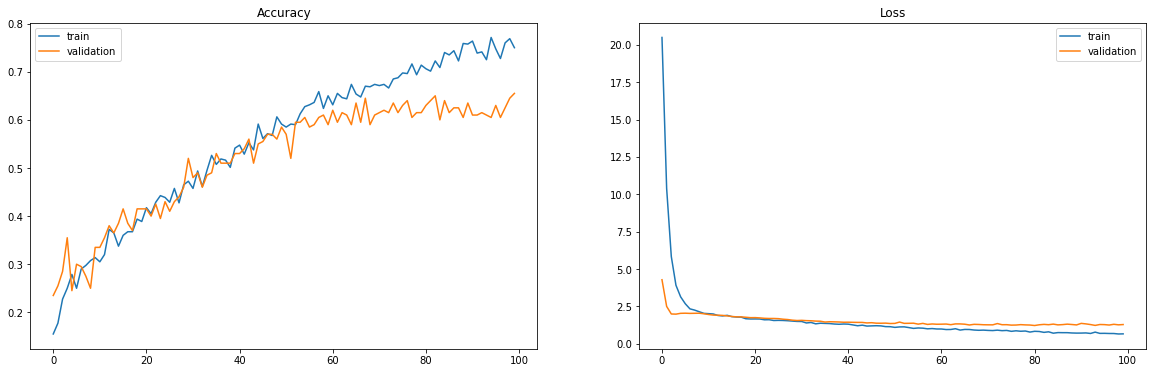

In [8]:
model_plot_validation(history)

In [10]:
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])
print("Training Loss: ", score[0])


score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])
print("Training Loss: ", score[0])

Training Accuracy:  0.925000011920929
Training Loss:  0.3552202880382538
Testing Accuracy:  0.6549999713897705
Training Loss:  1.2830804586410522


Even though the accuracy is quite high for the training data (0.92), we may see that for the validation data it does not happen the same. It is just 0.65. The same happens with the loss, it is worst for the validation data. Taking all this into account and the graphics we may say that the model is suffering from overfitting from epoch 60.

**Some Model modifications:**

Let's try to improve the model perfomance by _adding a new layer_:

In [9]:
model2 = Sequential()

model2.add(Dense(256, input_shape=(40,)))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))

model2.add(Dense(256))
model2.add(Activation('relu')) 
model2.add(Dropout(0.5))

#new layer
model2.add(Dense(256))
model2.add(Activation('relu')) 
model2.add(Dropout(0.5))

model2.add(Dense(num_labels))
model2.add(Activation('softmax'))

model2.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [13]:
history = fit_model(model2, x_train, y_train, x_test, y_test, epochs=100, batch_size=32, file_name='mlp2.hdf5')

Epoch 1/100
25/25 [==============================] - 1s 42ms/step - loss: 0.8318 - accuracy: 0.7138 - val_loss: 1.3524 - val_accuracy: 0.6000

Epoch 00001: val_loss improved from inf to 1.35236, saving model to saved_models\mlp2.hdf5
Epoch 2/100
25/25 [==============================] - 1s 27ms/step - loss: 0.8284 - accuracy: 0.6988 - val_loss: 1.4593 - val_accuracy: 0.6000

Epoch 00002: val_loss did not improve from 1.35236
Epoch 3/100
25/25 [==============================] - 1s 24ms/step - loss: 0.8344 - accuracy: 0.7013 - val_loss: 1.5061 - val_accuracy: 0.5900

Epoch 00003: val_loss did not improve from 1.35236
Epoch 4/100
25/25 [==============================] - 1s 26ms/step - loss: 0.8326 - accuracy: 0.7212 - val_loss: 1.4163 - val_accuracy: 0.6000

Epoch 00004: val_loss did not improve from 1.35236
Epoch 5/100
25/25 [==============================] - 0s 18ms/step - loss: 0.8531 - accuracy: 0.7050 - val_loss: 1.5440 - val_accuracy: 0.6050

Epoch 00005: val_loss did not improve fro


Epoch 00042: val_loss did not improve from 1.35236
Epoch 43/100
25/25 [==============================] - 1s 28ms/step - loss: 0.5868 - accuracy: 0.7975 - val_loss: 1.4962 - val_accuracy: 0.6100

Epoch 00043: val_loss did not improve from 1.35236
Epoch 44/100
25/25 [==============================] - 1s 25ms/step - loss: 0.6360 - accuracy: 0.7950 - val_loss: 1.4844 - val_accuracy: 0.6200

Epoch 00044: val_loss did not improve from 1.35236
Epoch 45/100
25/25 [==============================] - 1s 27ms/step - loss: 0.6161 - accuracy: 0.7812 - val_loss: 1.5374 - val_accuracy: 0.6150

Epoch 00045: val_loss did not improve from 1.35236
Epoch 46/100
25/25 [==============================] - 1s 26ms/step - loss: 0.6375 - accuracy: 0.7875 - val_loss: 1.5450 - val_accuracy: 0.5850

Epoch 00046: val_loss did not improve from 1.35236
Epoch 47/100
25/25 [==============================] - 1s 28ms/step - loss: 0.5692 - accuracy: 0.7950 - val_loss: 1.5142 - val_accuracy: 0.6150

Epoch 00047: val_loss di

25/25 [==============================] - 1s 27ms/step - loss: 0.4771 - accuracy: 0.8338 - val_loss: 1.6911 - val_accuracy: 0.6100

Epoch 00085: val_loss did not improve from 1.35236
Epoch 86/100
25/25 [==============================] - 1s 35ms/step - loss: 0.5795 - accuracy: 0.8200 - val_loss: 1.7521 - val_accuracy: 0.5850

Epoch 00086: val_loss did not improve from 1.35236
Epoch 87/100
25/25 [==============================] - 1s 30ms/step - loss: 0.5237 - accuracy: 0.8138 - val_loss: 1.7167 - val_accuracy: 0.6300

Epoch 00087: val_loss did not improve from 1.35236
Epoch 88/100
25/25 [==============================] - 1s 35ms/step - loss: 0.4763 - accuracy: 0.8400 - val_loss: 1.5848 - val_accuracy: 0.6450

Epoch 00088: val_loss did not improve from 1.35236
Epoch 89/100
25/25 [==============================] - 1s 22ms/step - loss: 0.4871 - accuracy: 0.8350 - val_loss: 1.6942 - val_accuracy: 0.6150

Epoch 00089: val_loss did not improve from 1.35236
Epoch 90/100
25/25 [==================

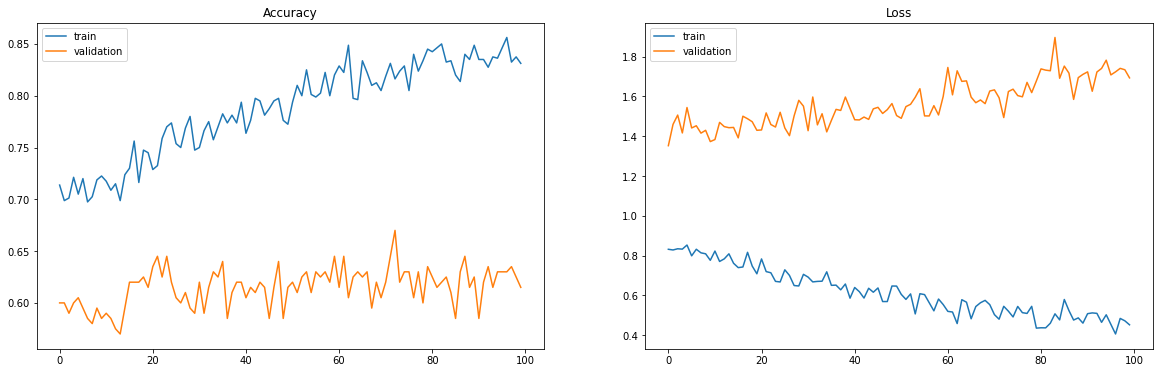

In [14]:
model_plot_validation(history)

In [15]:
score = model2.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])
print("Training Loss: ", score[0])


score = model2.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])
print("Training Loss: ", score[0])

Training Accuracy:  0.9725000262260437
Training Loss:  0.15051236748695374
Testing Accuracy:  0.6150000095367432
Training Loss:  1.6929937601089478


Adding a new layer didn't give a good result. It has increased the overfitting of our model.

Let's try to change the _optimazer learning rate_ or our first model. By default for Adam optimizer the learning rate value is 0.001.

In [23]:
opt3_1 = Adam(learning_rate=0.1)
opt3_2 = Adam(learning_rate=0.01)
opt3_3 = Adam(learning_rate=0.0001)

model3_1 = mlp_model();
model3_2 = mlp_model();
model3_3 = mlp_model();

model3_1.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt3_1)
model3_2.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt3_2)
model3_3.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt3_3)

In [24]:
history1 = fit_model(model3_1, x_train, y_train, x_test, y_test, epochs=100, batch_size=32, file_name='mlp31.hdf5')
history2 = fit_model(model3_2, x_train, y_train, x_test, y_test, epochs=100, batch_size=32, file_name='mlp32.hdf5')
history3 = fit_model(model3_3, x_train, y_train, x_test, y_test, epochs=100, batch_size=32, file_name='mlp33.hdf5')

Epoch 1/100
25/25 [==============================] - 3s 43ms/step - loss: 143.9430 - accuracy: 0.1180 - val_loss: 5.8532 - val_accuracy: 0.0950

Epoch 00001: val_loss improved from inf to 5.85320, saving model to saved_models\mlp31.hdf5
Epoch 2/100
25/25 [==============================] - 0s 16ms/step - loss: 4.4655 - accuracy: 0.1305 - val_loss: 3.0409 - val_accuracy: 0.0650

Epoch 00002: val_loss improved from 5.85320 to 3.04086, saving model to saved_models\mlp31.hdf5
Epoch 3/100
25/25 [==============================] - 0s 15ms/step - loss: 4.4511 - accuracy: 0.0847 - val_loss: 3.8722 - val_accuracy: 0.1200

Epoch 00003: val_loss did not improve from 3.04086
Epoch 4/100
25/25 [==============================] - 1s 22ms/step - loss: 11.6635 - accuracy: 0.1065 - val_loss: 2.5752 - val_accuracy: 0.1300

Epoch 00004: val_loss improved from 3.04086 to 2.57516, saving model to saved_models\mlp31.hdf5
Epoch 5/100
25/25 [==============================] - 0s 15ms/step - loss: 4.7318 - accurac

25/25 [==============================] - 0s 17ms/step - loss: 2.3007 - accuracy: 0.1215 - val_loss: 35.0921 - val_accuracy: 0.0750

Epoch 00042: val_loss did not improve from 2.28052
Epoch 43/100
25/25 [==============================] - 0s 15ms/step - loss: 2.3102 - accuracy: 0.0944 - val_loss: 35.0975 - val_accuracy: 0.0600

Epoch 00043: val_loss did not improve from 2.28052
Epoch 44/100
25/25 [==============================] - 0s 17ms/step - loss: 2.3089 - accuracy: 0.0942 - val_loss: 35.1049 - val_accuracy: 0.0600

Epoch 00044: val_loss did not improve from 2.28052
Epoch 45/100
25/25 [==============================] - 0s 19ms/step - loss: 2.3069 - accuracy: 0.1027 - val_loss: 35.0900 - val_accuracy: 0.0600

Epoch 00045: val_loss did not improve from 2.28052
Epoch 46/100
25/25 [==============================] - 0s 14ms/step - loss: 2.3057 - accuracy: 0.1110 - val_loss: 35.0954 - val_accuracy: 0.0650

Epoch 00046: val_loss did not improve from 2.28052
Epoch 47/100
25/25 [=============

25/25 [==============================] - 0s 17ms/step - loss: 2.2947 - accuracy: 0.1156 - val_loss: 69.3651 - val_accuracy: 0.0750

Epoch 00084: val_loss did not improve from 2.28052
Epoch 85/100
25/25 [==============================] - 0s 16ms/step - loss: 2.3090 - accuracy: 0.1023 - val_loss: 69.3730 - val_accuracy: 0.0650

Epoch 00085: val_loss did not improve from 2.28052
Epoch 86/100
25/25 [==============================] - 0s 17ms/step - loss: 2.2999 - accuracy: 0.1234 - val_loss: 69.3715 - val_accuracy: 0.1000

Epoch 00086: val_loss did not improve from 2.28052
Epoch 87/100
25/25 [==============================] - 0s 16ms/step - loss: 2.3071 - accuracy: 0.0916 - val_loss: 69.3708 - val_accuracy: 0.0650

Epoch 00087: val_loss did not improve from 2.28052
Epoch 88/100
25/25 [==============================] - 0s 14ms/step - loss: 2.3120 - accuracy: 0.0864 - val_loss: 69.3796 - val_accuracy: 0.0600

Epoch 00088: val_loss did not improve from 2.28052
Epoch 89/100
25/25 [=============

25/25 [==============================] - 0s 16ms/step - loss: 1.6236 - accuracy: 0.4112 - val_loss: 1.6577 - val_accuracy: 0.4450

Epoch 00023: val_loss did not improve from 1.56072
Epoch 24/100
25/25 [==============================] - 0s 16ms/step - loss: 1.6308 - accuracy: 0.3862 - val_loss: 1.7223 - val_accuracy: 0.4150

Epoch 00024: val_loss did not improve from 1.56072
Epoch 25/100
25/25 [==============================] - 0s 19ms/step - loss: 1.6307 - accuracy: 0.3898 - val_loss: 1.6534 - val_accuracy: 0.4200

Epoch 00025: val_loss did not improve from 1.56072
Epoch 26/100
25/25 [==============================] - 0s 16ms/step - loss: 1.6677 - accuracy: 0.4035 - val_loss: 1.6305 - val_accuracy: 0.4450

Epoch 00026: val_loss did not improve from 1.56072
Epoch 27/100
25/25 [==============================] - 0s 15ms/step - loss: 1.5440 - accuracy: 0.4285 - val_loss: 1.7829 - val_accuracy: 0.3800

Epoch 00027: val_loss did not improve from 1.56072
Epoch 28/100
25/25 [==================

25/25 [==============================] - 1s 24ms/step - loss: 1.5613 - accuracy: 0.4531 - val_loss: 1.6421 - val_accuracy: 0.4850

Epoch 00065: val_loss did not improve from 1.56072
Epoch 66/100
25/25 [==============================] - 1s 32ms/step - loss: 1.6265 - accuracy: 0.3726 - val_loss: 1.6377 - val_accuracy: 0.4100

Epoch 00066: val_loss did not improve from 1.56072
Epoch 67/100
25/25 [==============================] - 1s 22ms/step - loss: 1.6006 - accuracy: 0.4312 - val_loss: 1.6633 - val_accuracy: 0.4500

Epoch 00067: val_loss did not improve from 1.56072
Epoch 68/100
25/25 [==============================] - 1s 37ms/step - loss: 1.6193 - accuracy: 0.4193 - val_loss: 1.6771 - val_accuracy: 0.4500

Epoch 00068: val_loss did not improve from 1.56072
Epoch 69/100
25/25 [==============================] - 0s 17ms/step - loss: 1.5742 - accuracy: 0.4191 - val_loss: 1.7585 - val_accuracy: 0.4300

Epoch 00069: val_loss did not improve from 1.56072
Epoch 70/100
25/25 [==================

25/25 [==============================] - 0s 15ms/step - loss: 18.6283 - accuracy: 0.1233 - val_loss: 4.4631 - val_accuracy: 0.2100

Epoch 00006: val_loss improved from 4.88307 to 4.46306, saving model to saved_models\mlp33.hdf5
Epoch 7/100
25/25 [==============================] - 1s 30ms/step - loss: 17.3053 - accuracy: 0.1498 - val_loss: 3.6398 - val_accuracy: 0.2450

Epoch 00007: val_loss improved from 4.46306 to 3.63978, saving model to saved_models\mlp33.hdf5
Epoch 8/100
25/25 [==============================] - 1s 34ms/step - loss: 16.3830 - accuracy: 0.1416 - val_loss: 3.4511 - val_accuracy: 0.2250

Epoch 00008: val_loss improved from 3.63978 to 3.45115, saving model to saved_models\mlp33.hdf5
Epoch 9/100
25/25 [==============================] - 0s 20ms/step - loss: 15.6950 - accuracy: 0.1309 - val_loss: 3.3877 - val_accuracy: 0.2350

Epoch 00009: val_loss improved from 3.45115 to 3.38765, saving model to saved_models\mlp33.hdf5
Epoch 10/100
25/25 [==============================] 

25/25 [==============================] - 0s 15ms/step - loss: 3.6285 - accuracy: 0.2191 - val_loss: 2.1274 - val_accuracy: 0.2100

Epoch 00043: val_loss did not improve from 1.98524
Epoch 44/100
25/25 [==============================] - 0s 16ms/step - loss: 3.3524 - accuracy: 0.2247 - val_loss: 2.1260 - val_accuracy: 0.2100

Epoch 00044: val_loss did not improve from 1.98524
Epoch 45/100
25/25 [==============================] - 0s 19ms/step - loss: 3.0018 - accuracy: 0.2224 - val_loss: 2.1298 - val_accuracy: 0.2100

Epoch 00045: val_loss did not improve from 1.98524
Epoch 46/100
25/25 [==============================] - 0s 15ms/step - loss: 2.9585 - accuracy: 0.2344 - val_loss: 2.1344 - val_accuracy: 0.2150

Epoch 00046: val_loss did not improve from 1.98524
Epoch 47/100
25/25 [==============================] - 0s 15ms/step - loss: 3.1150 - accuracy: 0.2293 - val_loss: 2.1368 - val_accuracy: 0.2200

Epoch 00047: val_loss did not improve from 1.98524
Epoch 48/100
25/25 [==================

25/25 [==============================] - 0s 17ms/step - loss: 2.1748 - accuracy: 0.2706 - val_loss: 2.1192 - val_accuracy: 0.2200

Epoch 00085: val_loss did not improve from 1.98524
Epoch 86/100
25/25 [==============================] - 0s 19ms/step - loss: 2.2077 - accuracy: 0.2542 - val_loss: 2.1164 - val_accuracy: 0.2200

Epoch 00086: val_loss did not improve from 1.98524
Epoch 87/100
25/25 [==============================] - 1s 25ms/step - loss: 2.1119 - accuracy: 0.2747 - val_loss: 2.1108 - val_accuracy: 0.2200

Epoch 00087: val_loss did not improve from 1.98524
Epoch 88/100
25/25 [==============================] - 0s 19ms/step - loss: 2.1136 - accuracy: 0.2938 - val_loss: 2.1083 - val_accuracy: 0.2300

Epoch 00088: val_loss did not improve from 1.98524
Epoch 89/100
25/25 [==============================] - 1s 22ms/step - loss: 2.1047 - accuracy: 0.2739 - val_loss: 2.1086 - val_accuracy: 0.2250

Epoch 00089: val_loss did not improve from 1.98524
Epoch 90/100
25/25 [==================

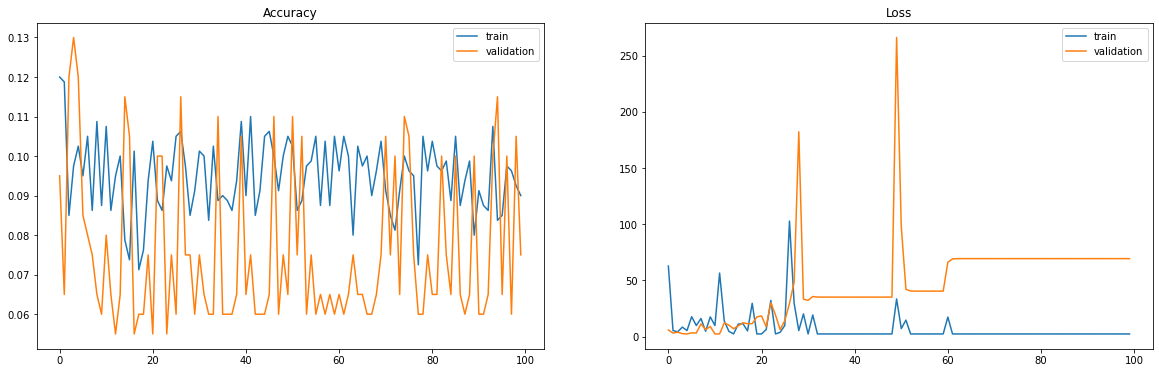

In [25]:
model_plot_validation(history1)

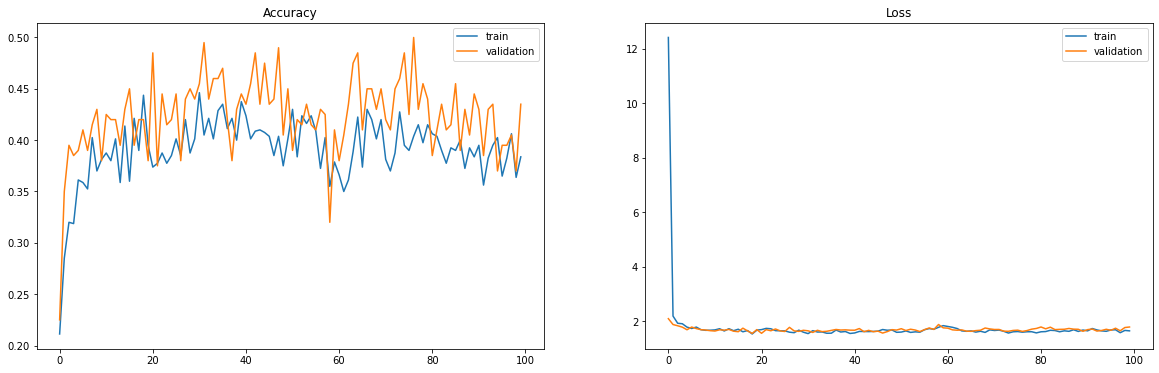

In [26]:
model_plot_validation(history2)

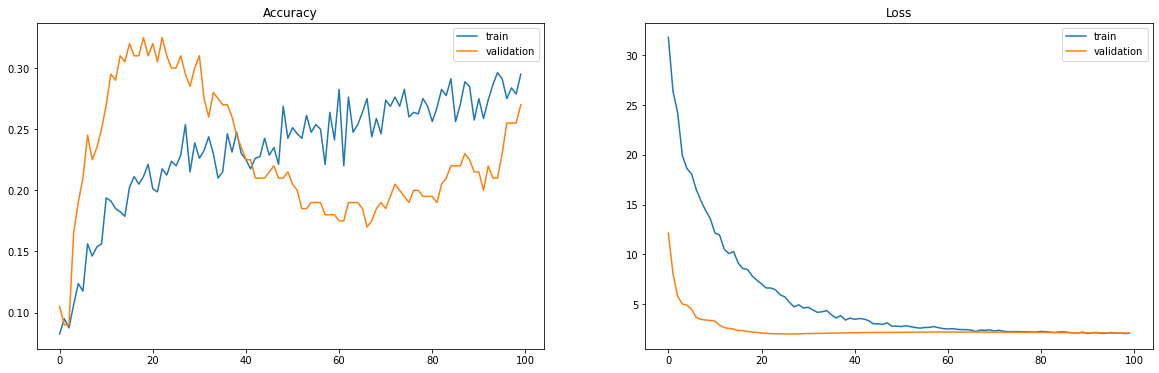

In [27]:
model_plot_validation(history3)

Any of the new learning rates has given a good result.